In [19]:
import plaidml.keras

In [20]:
plaidml.keras.install_backend()

In [47]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [48]:
train_images.shape#Размер массива

(60000, 28, 28)

In [49]:
train_labels
len(train_labels) #Длина массива

60000

In [50]:
test_images.shape#Размер тестовой части

(10000, 28, 28)

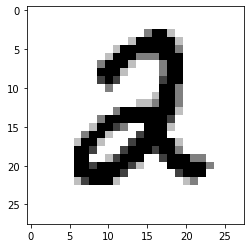

In [51]:
digit = train_images[11552]#Цифра №1152
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)#cmap=plt.cm.binary что такое ?
plt.show();

In [52]:
my_slice = train_images[10:100]# Выбираем все картикни с цифрами с 10 по 1000
print(my_slice.shape)

(90, 28, 28)


In [53]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks_list = [
    EarlyStopping(
        monitor='val_acc',
        patience=8),
    ModelCheckpoint(
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=2)
]

In [54]:
my_slice = train_images[10:100, 0:28, 0:28] #то же что и раньше
print(my_slice.shape)

(90, 28, 28)


In [55]:
from keras import models
from keras import layers
#добавляем слои
network = models.Sequential()

#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))#relu это функция активации


network.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (2, 2), activation='relu'))
#network.add(layers.MaxPooling2D((2, 2)))
#network.add(layers.Conv2D(128, (2, 2), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (2, 2), activation='relu'))

network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))



network.add(layers.Dense(10, activation='softmax'))# softmax функция активации - создает распределение вероятностей (10 шт)

In [56]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 128)       16512     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 5, 5, 128)         65664     
_________________________________________________________________
flatten_6 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               1638912   
__________

In [57]:
train_images = train_images.reshape((60000, 28, 28,1))# мы типа переводим 28,28 в одномерный массив и 
train_images = train_images.astype('float32') / 255#делим на максимальное число цветов
test_images = test_images.reshape((10000, 28 , 28,1))
test_images = test_images.astype('float32') / 255

In [58]:
network.compile(optimizer='rmsprop',#оптимизатор - базовый
loss='categorical_crossentropy',  #Эта функция потерь
metrics=['accuracy'])#отслежитваемый параметр

In [59]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)#перевод массива (картинки) в категориальное состояние
test_labels = to_categorical(test_labels)

In [60]:
train_labels.shape

(60000, 10)

In [61]:
history = network.fit(train_images, train_labels, epochs=40, 
                      batch_size=64,
                      callbacks=callbacks_list,validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 32s 537us/step - loss: 0.1240 - acc: 0.9614 - val_loss: 0.0339 - val_acc: 0.9892
Epoch 2/40
60000/60000 [==============================] - 13s 209us/step - loss: 0.0378 - acc: 0.9889 - val_loss: 0.0401 - val_acc: 0.9879
Epoch 3/40
60000/60000 [==============================] - 13s 218us/step - loss: 0.0269 - acc: 0.9917 - val_loss: 0.0354 - val_acc: 0.9895
Epoch 4/40
60000/60000 [==============================] - 13s 220us/step - loss: 0.0095 - acc: 0.9972 - val_loss: 0.0203 - val_acc: 0.9939
Epoch 5/40
60000/60000 [==============================] - 13s 216us/step - loss: 0.0065 - acc: 0.9983 - val_loss: 0.0215 - val_acc: 0.9938
Epoch 6/40
60000/60000 [==============================] - 12s 208us/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.0224 - val_acc: 0.9937
Epoch 7/40
60000/60000 [==============================] - 12s 207us/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.

In [16]:

test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/step


In [17]:
print('test_acc:', test_acc)

test_acc: 0.9839


In [1]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

NameError: name 'history' is not defined